# Exploring evidence for climate change and extreme events
*(courtesy of G Hegerl, adapted by D Watson-Parris)*

Climate change is one of the most pressing issues facing the world which requires clear communication of the evidence about how the climate is changing. In this project, you will use surface air temperaure data to produce various graphs that explore where and how the climate is changing. 

<img src="https://behavioralscientist.org/wp-content/uploads/2019/09/climate_change_header.png" width = 50%>

## Introduction

In this exercise you will perform various analyses on surface air temperature data. 


In [1]:
## Some libraries you might like to use...

import iris
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs

## Part 1: Data Management

Find the HadCRUT4 global surface temperature data in `shared_data` and load it into python using `iris`, (Note that the file is called 'median' - as it is the median of an ensemble of datasets spanning uncertainty which is available elsewhere, it is fine to only use the median here). 

Print the DataSet so you can see what the coordinates and variables are. This is important for yourselves so that you refer to them correctly in the later analyses:
- What are the coordinates?
- What are the Data Variables?
    - Which one corresponds to the air temperature anomaly?

In [21]:
cubes = iris.load('HadCRUT.4.6.0.0.median.nc')
cube=cubes[0]

This dataset is composed of a time series of global maps of surface air temperature anomalies. Specifically, these are anomalies of each month against the average monthly temperature between 1961-1990. The file has missing data where instruments could not record the surface air temperature, which we refer to as null values. 

These data are recorded monthly.

These data are different from the reanalysis data we worked with last week as they are derived from instrumentally measured temperature measurements of air surface and sea surface temperature (see lecture on datasources).

**Discussion 1.1: Briefly discuss the differences, and what the benefit and drawback is of using these instrumental data as compared with the reanalysis data.**

**Question 1.2a: This data has many missing points, plot a map of the total number of missing values in a month summed over all years.**
- You'll need to add a `coord_categorisation` to get month numbers
- Use `aggregated_by()` to collapse these many timeslices into monthly summaries where you sum the number of values at each location to find out where the most missing values have occured. The `da.ma.getmaskarray` function returns the missing value mask for a cube.

In [22]:
import iris.coord_categorisation as coord_cat
coord_cat.add_month_number(cube, 'time', name='month_number')
print(cube.coord('month_number'))

AuxCoord(array([1, 2, 3, ..., 7, 8, 9]), standard_name=None, units=Unit('1'), long_name='month_number', attributes={'end_month': 9, 'end_year': 2019, 'start_month': 1, 'start_year': 1850})


In [35]:
getmask.

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., 4.844532012939453, --, --],
         ...,
         [--, --, 1.7500066757202148, ..., --, --, --],

In [41]:
import dask.array as da
da.ma.getmaskarray(cube.data)
monthly_sum = cube.aggregated_by('month_number', iris.analysis.COUNT, function=lambda count: da.ma.getmaskarray(count))

In [44]:
monthly_sum.shape

(12, 36, 72)

/opt/tljh/user/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/tljh/user/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


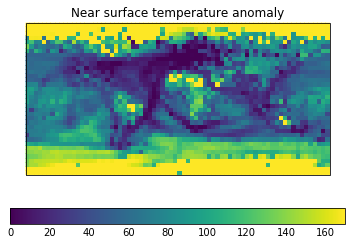

In [45]:
import iris.quickplot as qplt
qplt.pcolormesh(monthly_sum[0], cmap='viridis')
qplt.show()

#### TARGET FIGURE:

<img src="numberOfNullsMap.png">

**Bonus Question 1.2b:** Use widgets to make an interactive version of this plot so that the slider bar allows you to see maps of the number of null values in each of the 12 months.

In [46]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def plot_func(month_idx):
    qplt.pcolormesh(monthly_sum[month_idx], cmap='viridis')

interact(plot_func, month_idx = widgets.IntSlider(value=0, min=0, max=11, step=1))

interactive(children=(IntSlider(value=0, description='month_idx', max=11), Output()), _dom_classes=('widget-in…

<function __main__.plot_func(month_idx)>

**Discussion 1.2c: Discuss some of the features of the monthly patterns of the null values**

**QUESTION 1.3: Plot a time series of the globally spatially averaged temperature anamaly**

Whilst you can just average over the dimensions of latitude and longitude, the best answers here will perform area weighting.

We will be using this plot in Part 2.

In [48]:
global_mean = cube.collapsed(['latitude', 'longitude'],
                             iris.analysis.MEAN)

/opt/tljh/user/lib/python3.7/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/tljh/user/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/tljh/user/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


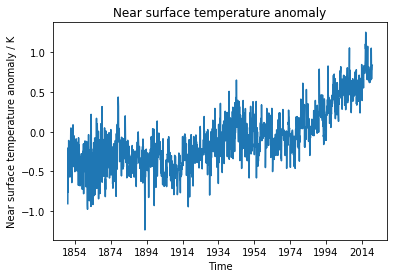

In [51]:
qplt.plot(global_mean)

#### TARGET FIGURE

<img src="globallyAveragedanomaly.png">

# Part 2: How close are we to exceeding the target for global warming set at the  Paris Agreement of 1.5 degrees global mean warming? [20pt]

In Paris 2015, the COP Climate Conference decided to limit global warming to 1.5 or 2 degrees since, the period 1850-1900. 

Here, we will use the timeseries of the globally averaged surface temperature you have calculated above (Section 1.3) to estimate how much warming has occurred since the period 1850-1900 to determine how much more warming can occur and stay within this limit. 

Your method should represent today's global warming levels reasonably well, and also capture the average period 1850-1900 approximately. 

FYI: Note that this analysis assumes that all the warming has been caused by human influences - this happens to be approximately true, although a fairly involved analysis (that we do not do here) was used to estimate that.

**Discussion 2.1a:** Discuss which methods you could apply and why; and develop a plan of analysis you will try. You could consider, for example, plotting polynomial trendlines to the globally averaged monthly surface air temperature data that you just plotted above. How might you quantify the long term temperature change?

**QUESTION 2.1b** 

Quantify the amount of warming since the 1850-1900 period using the methods you discussed. For example, compare and comment on the quality of order 1 (linear),  order 2 (quadratic) and order 3 (cubic) polynomials. 

_HINT:_ Regression plots are easy with [seaborn.pydata.org/](`seaborn`) once you have the data in a pandas DataFrame. We haven't covered this explicitly but I've given a (fairly basic) example to get you going. Explore the docs and look at the gallery to use this nice library.

- Below, I have assumed your global average timeseries is called `global_mean` and converted this to a Pandas DataFrame.
- How can you quickly assess the validity of the regression lines?

In [58]:
from iris.pandas import as_data_frame

df = pd.DataFrame(global_mean.data, global_mean.coord('time').points)


In [59]:
df.iloc[:12*50].mean()

0   -0.331532
dtype: float64

In [74]:
global_mean.coord('time')

DimCoord(array([1.55000e+01, 4.50000e+01, 7.45000e+01, ..., 6.19225e+04,
       6.19535e+04, 6.19840e+04], dtype=float32), standard_name='time', units=Unit('days since 1850-1-1 00:00:00', calendar='gregorian'), long_name='time', var_name='time', attributes={'end_month': 9, 'end_year': 2019, 'start_month': 1, 'start_year': 1850})

In [65]:
np.polyfit(np.linspace, global_mean.data, 3)

AttributeError: 'DimCoord' object has no attribute 'size'

**Question 2.1c:** 
- Using the results of your analysis, discuss how well your different approaches capture the trend and to what extent the residual variability is consistent with random fluctuations. 
- From your graphs, estimate the amount of warming that has occurred so far using the best estimate and roughly (visually) estimate uncertainty. How much more warming can we observe before we exceed the target of limiting global warming to 1.5 or 2 degrees relative to the early industrial period of 1850-1900?
- What would have to be done to arrive at a full uncertainty estimate?

# Part 3: Climate warming over the human lifetime

Now we will look at a map of how much warming has occurred over the lifetime of one of your grandparents.

- You will need to find the difference between two maps that are representative of the modern temperature and around the birthdate of a grandparent. 
- Plot the averaged anomaly maps for both time periods as well as the difference.
- Remember that monthly and annual temperatures are fairly variable from year to year so you should use a suitably long time-window to average over.

**Discussion 3.1a** Briefly discuss a plan for implementing this including any assumptions, limitations or potential weaknesses:

**QUESTION 3.1b:** Now implement your analysis to produce a  map of warming:

**QUESTION 3.1c:** By looking at the maps, come up with three interesting observations  and describe what they show .

For example:
- is it warming more in the arctic of the tropics (near the equator)? 
- Is it warming more in the summer than the winter? 
- Is it warming everywhere? 
- etc...

# Part 4: Monthly extreme temperature anomaly 

We are now looking at extreme months at 3 locations you would like to use (could be Oxford, but could be also any other part of the world you are interested in, but choose one that has data (not all null values) through a relatively long period) and pull out that datapoint and plot its timeseries

**QUESTION 4.1a:** Take one of the null maps from Section 1.2a, and plot your three locations of interest on it.

**QUESTION 4.1b:** Plot the timeseries of the temperature anomaly at each of the locations.
- Highlight where the extreme values occur (See week 6, you might need to convert to a data frame again)

In [ ]:
# *Hint*: In order to create a Pandas DateTimeIndex and enable all of the associated Pandas functionality use the (slightly unsatisfactory) example code below:

import cftime 
datetimes = cftime.num2pydate(global_mean.coord('time').points, str(global_mean.coord('time').units))
print(datetimes)

**Discussion 4.1d:** In words, compare and contrast the temperature anomalies at these three locations.

**QUESTION 4.1e:** Use boxplots to visually summaries the monthly temperature anomalies for each of the locations.
- You might find the seaborn boxplot function useful here
    - https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Remember the seaborn works on a suitable DataFrame

**Discussion 4.1f:** Discuss monthly trends in the temperature anomalies paying particular attention to the averages, spread and significant of outliers.